In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Pre set up
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [8]:
df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# EDA

In [48]:
df.shape

(1000, 11)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [54]:
# include="all" -> include allthe column
# T -> Transpose 
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.Risk.value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [11]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [19]:
len(df.Age.unique())

53

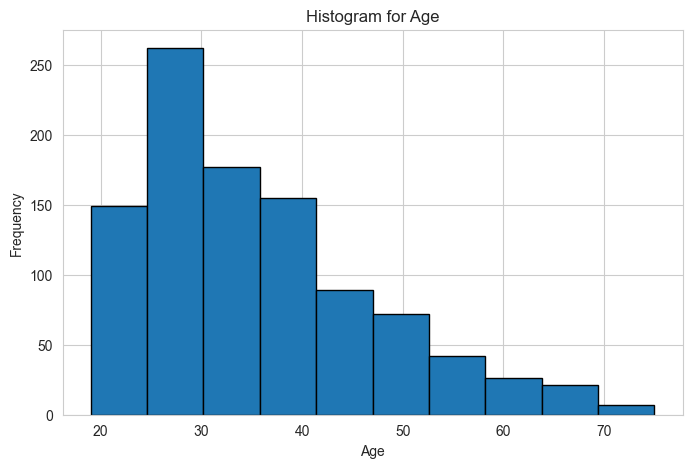

In [31]:
plt.figure(figsize = (8,5))
plt.hist(df.Age,bins = 10,edgecolor = 'black')
plt.title("Histogram for Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [46]:
g = df.columns
for i in g:
    count = sum(df[i].isna())
    if count>0:
        print(f"The column {i} contains {count} null values")

The column Saving accounts contains 183 null values
The column Checking account contains 394 null values


In [58]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [59]:
# check any duplicated row
df.duplicated().sum()

np.int64(0)

In [9]:
# Remove null values. Because we don't wanna impute these as it is - they are very important features  
df = df.dropna().reset_index(drop=True)
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad


In [81]:
#list(df.columns)
df.columns.tolist()

['Unnamed: 0',
 'Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

In [10]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
5,25,female,2,rent,little,moderate,1295,12,car,bad
6,24,female,2,rent,little,little,4308,48,business,bad
7,22,female,2,own,little,moderate,1567,12,radio/TV,good
8,60,male,1,own,little,little,1199,24,car,bad
9,28,female,2,rent,little,little,1403,15,car,good


In [8]:
# numerical or continuous columns are
df[['Age','Credit amount','Duration']]

,Age,Credit amount,Duration
0,22,5951,48
1,45,7882,42
2,53,4870,24
3,35,6948,36
4,28,5234,30
...,...,...,...
517,48,1743,24
518,30,3959,36
519,40,3857,30
520,23,1845,45


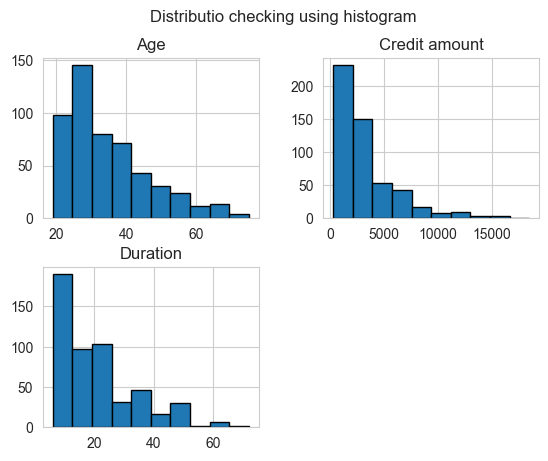

In [11]:
# continuous value distribution
df[['Age','Credit amount','Duration']].hist(bins = 10,edgecolor = 'black')
plt.suptitle('Distributio checking using histogram')
plt.show()

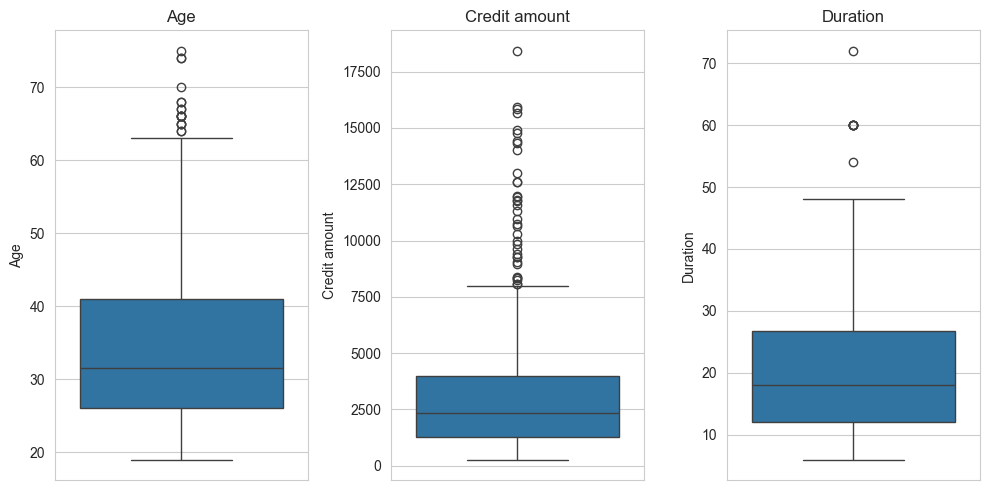

In [12]:
# Draw blox plots - used for finding outliers
plt.figure(figsize = (10,5))

for i, col in enumerate(['Age','Credit amount','Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [108]:
len(df[df['Age']>60])

25

In [112]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [13]:
cat_columns = ['Sex','Job','Housing','Saving accounts', 'Checking account','Purpose']
df[cat_columns].head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,female,2,own,little,moderate,radio/TV
1,male,2,free,little,little,furniture/equipment
2,male,2,free,little,little,car
3,male,3,rent,little,moderate,car
4,male,3,own,little,moderate,car


C:\Users\moham\AppData\Local\Temp\ipykernel_14744\4191643021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x = col, palette = "Set2",order = df[col].value_counts().index)
C:\Users\moham\AppData\Local\Temp\ipykernel_14744\4191643021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x = col, palette = "Set2",order = df[col].value_counts().index)
C:\Users\moham\AppData\Local\Temp\ipykernel_14744\4191643021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x = col, palette = "Set2",order = df[col].va

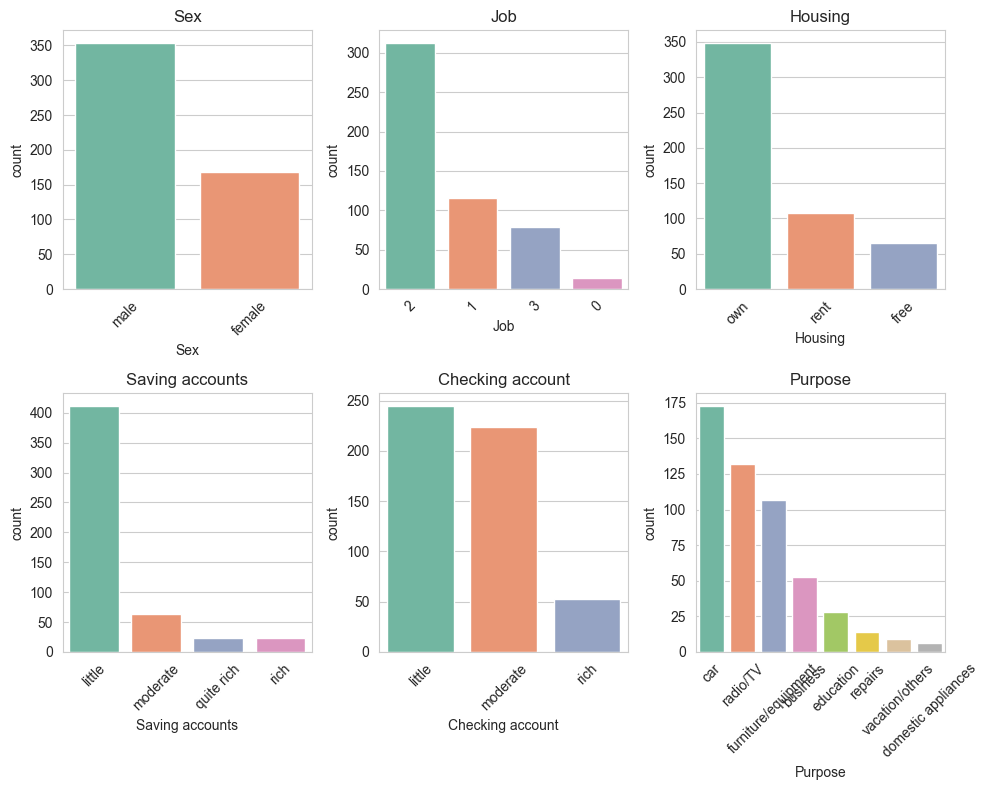

In [15]:
#distribution of categorical columns
plt.figure(figsize = (10,8))
for i, col in enumerate(cat_columns):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df,x = col, palette = "Set2",order = df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [19]:
df.groupby('Job')['Credit amount'].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [20]:
df.groupby('Sex')['Credit amount'].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [23]:
pd.pivot_table(df,values = 'Credit amount',index = 'Housing',columns = 'Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


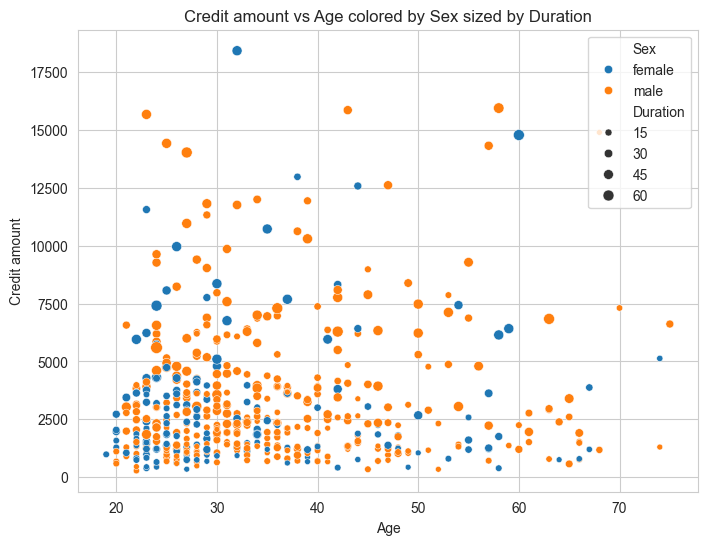

In [30]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x='Age',y='Credit amount', hue = 'Sex', size = 'Duration')
plt.title('Credit amount vs Age colored by Sex sized by Duration')
plt.show()

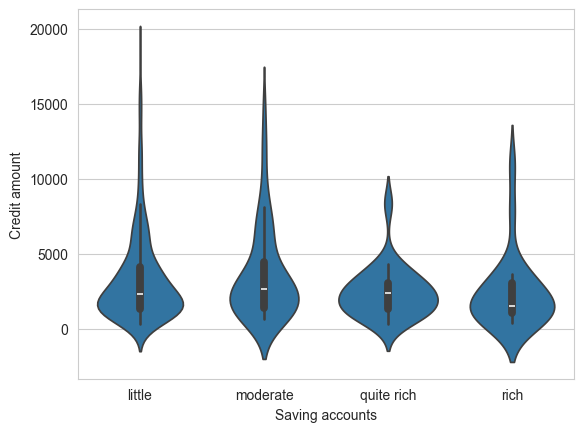

In [33]:
sns.violinplot(data = df, x = "Saving accounts",y = "Credit amount")
plt.show()

In [ ]:
'''
Analysis
X-axis: Categories of Saving Accounts ("little", "moderate", "quite rich", "rich")

Y-axis: Credit Amount

Violin Plots: Show the distribution and density of credit amounts for each saving account group. The width shows the concentration of data; the thicker sections = more cases.

Key Conclusions
All saving account groups ("little", "moderate", "quite rich", "rich") are centered around similar median credit amounts (the white dot/line inside each violin).

“Little” and “moderate” groups show a longer upper tail, indicating some people with these accounts have much higher credit amounts (wider spread and more high-value outliers).

“Quite rich” and “rich” have tighter distributions, meaning fewer cases with very high credit amounts and more concentration around lower values.

The overall tendency is: people with "little" and "moderate" savings accounts are more likely to take out larger credit amounts, with more extreme values/outliers.

Those with "quite rich" and "rich" saving accounts borrow lower amounts on average, with a smaller spread.

Insights
People with modest savings ("little", "moderate") are more likely to request very large credit amounts compared to the wealthier groups.

Wealthier individuals (“quite rich”, “rich” accounts) tend to request smaller, more consistent credit amounts.

The trend indicates potentially higher risk or need in "little" and "moderate" groups for larger loans.
'''

In [37]:
df['Risk'].value_counts(normalize = True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\moham\AppData\Local\Temp\ipykernel_14744\1395026551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,x = 'Risk',y = col, palette = 'Pastel2')
C:\Users\moham\AppData\Local\Temp\ipykernel_14744\1395026551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,x = 'Risk',y = col, palette = 'Pastel2')
C:\Users\moham\AppData\Local\Temp\ipykernel_14744\1395026551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,x = 'Risk',y = col, palette = 'Pastel2')


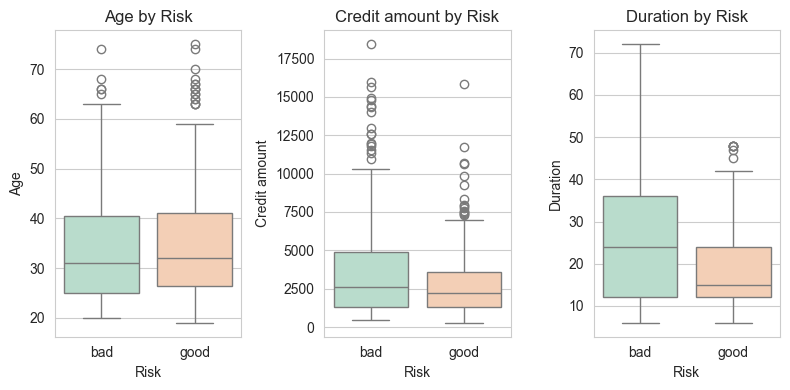

In [46]:
plt.figure(figsize=(8,4))
for i, col in enumerate(['Age','Credit amount','Duration']):
    plt.subplot(1,3,i+1)
    sns.boxplot(data = df,x = 'Risk',y = col, palette = 'Pastel2')
    plt.title(f"{col} by Risk")
plt.tight_layout()
plt.show()
    

In [ ]:
"""
Chart 1: Age by Risk

Both "bad" and "good" risk groups have similar age distributions and median ages.

Outliers (older ages) exist in both groups, slightly more in "good" risk.

Conclusion: Age does not significantly distinguish between "bad" and "good" risk groups.


Chart 2: Credit Amount by Risk

The "bad" risk group typically takes higher credit amounts (higher median and more high-value outliers).

The "good" risk group has lower credit amounts overall and fewer large outliers.

Conclusion: Higher credit amounts are associated with "bad" risk, while lower amounts tend to be "good."



Chart 3: Duration by Risk

Loan duration is longer for the "bad" risk group (higher median and wider spread/outliers).

The "good" risk group shows shorter durations and a lower spread.

Conclusion: Longer loan durations are more common with "bad" risk, while shorter durations are linked to "good" risk.



Main Insights
Credit amount and duration are more useful for distinguishing risk than age.

Individuals with higher credit amounts and longer durations are more likely to be in the "bad" risk group.

Age is not a strong indicator of risk, based on this dataset.

"""


In [48]:
df.groupby('Risk')[['Age','Credit amount','Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [49]:
cat_columns

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

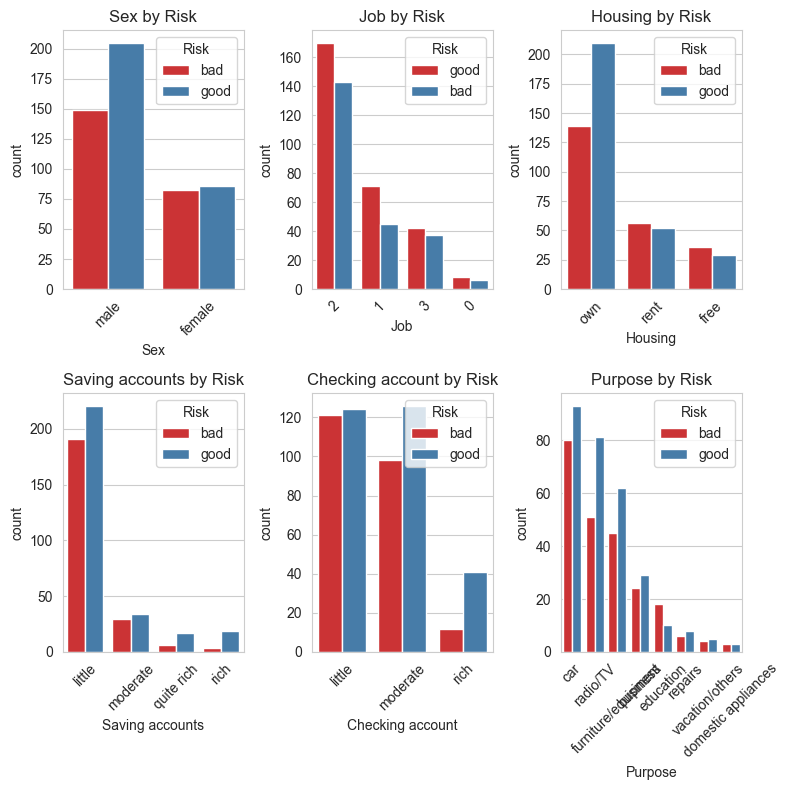

In [59]:
plt.figure(figsize = (8,8))
for i, col in enumerate(cat_columns):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df, x = col, hue = 'Risk',palette = 'Set1', order = df[col].value_counts().index)
    plt.xticks(rotation = 45)
    plt.title(f"{col} by Risk")
plt.tight_layout()
plt.show()

# Feature engineering

In [11]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [12]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration']

In [13]:
target = "Risk"

In [14]:
real_df = df[features+[target]]
real_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [15]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [16]:
cat_col = real_df.select_dtypes(include = 'object').columns.drop( 'Risk')
cat_col

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [17]:
le_dict = {}
for col in cat_col:
    le = LabelEncoder()
    real_df[col] = le.fit_transform(real_df[col])
    le_dict[col] = le
    joblib.dump(le,f"{col}_encoder.pkl")

C:\Users\moham\AppData\Local\Temp\ipykernel_26220\3421743390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df[col] = le.fit_transform(real_df[col])
C:\Users\moham\AppData\Local\Temp\ipykernel_26220\3421743390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df[col] = le.fit_transform(real_df[col])
C:\Users\moham\AppData\Local\Temp\ipykernel_26220\3421743390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [18]:
le_encoder = LabelEncoder()
real_df[target] = le_encoder.fit_transform(real_df[target])
joblib.dump(le_encoder,"target_encoder.pkl")
real_df

C:\Users\moham\AppData\Local\Temp\ipykernel_26220\942132416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df[target] = le_encoder.fit_transform(real_df[target])


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0
...,...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24,1
518,30,1,3,1,0,0,3959,36,1
519,40,1,3,1,0,0,3857,30,1
520,23,1,2,0,0,0,1845,45,0


In [19]:
real_df[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X = real_df[features]
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [22]:
y = real_df[target]
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y , random_state=42)
X_train.shape

(417, 8)

In [24]:
X_test.shape

(105, 8)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [31]:
def train_model(model,param_grid,X_train, X_test, y_train, y_test):
    grid = GridSearchCV(model,param_grid,cv = 5,scoring = "accuracy",n_jobs=-1)
    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_pred,y_test)
    return best_model,acc, grid.best_params_
    

In [27]:
dt = DecisionTreeClassifier(random_state = 1,class_weight="balanced")
dt_param_grid = {
    "max_depth" : [3,5,7,10,None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]

}


In [32]:
best_dt,acc_dt,params_dt = train_model(dt,dt_param_grid,X_train, X_test, y_train, y_test)

In [33]:
acc_dt

0.6

In [35]:
rf = RandomForestClassifier(random_state = 1,class_weight="balanced")
rf_param_grid = {
    "n_estimators":[100,200],
    "max_depth" : [5,7,10,None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}


In [36]:
best_rf,acc_rf,params_rf = train_model(rf,rf_param_grid,X_train, X_test, y_train, y_test)
acc_rf

0.6476190476190476

In [37]:
et = ExtraTreesClassifier(random_state = 1,class_weight="balanced")
et_param_grid = {
    "n_estimators":[100,200],
    "max_depth" : [5,7,10,None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}


In [38]:
best_et,acc_et,params_et = train_model(et,et_param_grid,X_train, X_test, y_train, y_test)
acc_et

0.6095238095238096

In [41]:
xgb = XGBClassifier(random_state = 1, scale_pos_weight = (y_train == 0).sum()/(y_train == 1).sum(),use_label_encoder = False, eval_metric = "logloss")
xgb_param_grid = {
    "n_estimators":[100,200],
    "max_depth" : [5,7,10,None],
    "max_depth" : [3,5,7],
    "learning_rate" : [0.01,0.1,0.2],
    "subsample" : [0.7,1],
    "colsample_bytree" : [0.7,1]
}

In [42]:
best_xgb,acc_xgb,params_xbg = train_model(xgb,xgb_param_grid,X_train, X_test, y_train, y_test)
acc_xgb

c:\python_for_keras\lib\site-packages\xgboost\training.py:199: UserWarning: [14:46:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.6857142857142857

## so best model is xgb

In [43]:
params_xbg

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.7}

In [51]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [52]:
# Get best model and predictions
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]  # needed for ROC-AUC

# Core metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

In [55]:
# Display metrics
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}\n")

Accuracy     : 0.6857
Precision    : 0.7097
Recall       : 0.7458
F1 Score     : 0.7273
ROC-AUC Score: 0.7399



In [56]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.6512    0.6087    0.6292        46
           1     0.7097    0.7458    0.7273        59

    accuracy                         0.6857       105
   macro avg     0.6804    0.6772    0.6782       105
weighted avg     0.6840    0.6857    0.6843       105



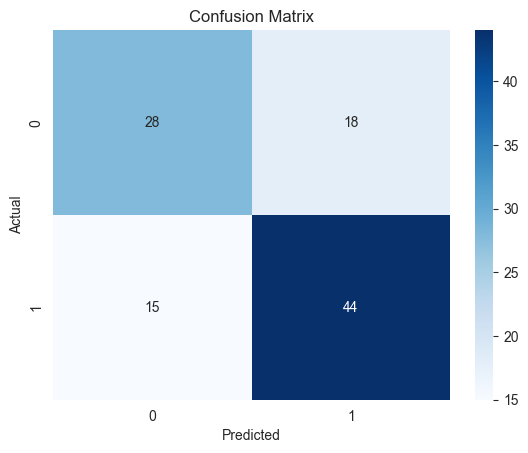

In [58]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [57]:
real_df.Risk.value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [45]:
joblib.dump(best_xgb,"best_model.pkl")

['best_model.pkl']